# In this notebook we select different dataset sizes based on several criteria to try to get more accuracy and representativeness reducing some fields

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('df_clean.csv')

In [36]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,names,Id,brewerId,ABV,style,appearance,aroma,...,profile_name,text,time2,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers
0,5930,7,7,Caldera Ginger Beer,52159,1075,4.7,Herbed / Spiced Beer,3.5,2.5,...,alpinebryant,""" Bottle says """"Malt beverage brewed with Ging...",2011-05-24,24,5,2011,13938,2,0,0
1,5931,1200136,1200398,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,...,alpinebryant,""" Pours a dark hazy coffee grind black with li...",2011-05-24,24,5,2011,13938,2,0,0
2,5932,4108,4108,Frog's Hollow Double Pumpkin Ale,52211,14879,8.4,Pumpkin Ale,4.5,4.5,...,alpinebryant,""" Let me start by saying this is a very good I...",2010-10-21,21,10,2010,13938,2,0,0
3,5933,1044623,1044853,DNR Belgian-Style Golden Ale,49193,19456,10.0,Belgian Strong Pale Ale,4.0,5.0,...,alpinebryant,""" Pours an amber with a healthy cream head wit...",2010-10-21,21,10,2010,13938,2,0,0
4,5934,11711,11712,Polygamy Porter,43893,7402,4.0,American Porter,2.5,4.0,...,alpinebryant,""" Call me spoiled, but this beer isn't worth i...",2009-03-08,8,3,2009,13938,1,0,0


### We make a new column with values 1 (overall >= 4.0)  then we have the code to value good beers

In [6]:
def recode(row):
    if row['overall'] >=4.0:
        val = 1
    else:
        val = 0
    return val

In [7]:
df['rate_recode'] = df.apply (recode, axis=1)

In [6]:
df.sample(5)

,Unnamed: 0,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,time,profile_name,text,time2,day,month,year,user_id,rate_recode
101960,101975,Hale's Cream Ale,2988,932,4.90,Cream Ale,4.5,3.0,4.5,3.5,4.0,1185771192,josiahschlender,""" Had this at Concordia Ale house on nitro-tap...",1970-01-01,1,1,1970,23150,1
625568,625703,Julio's Saison,69365,10279,8.50,Saison / Farmhouse Ale,2.5,3.0,4.0,3.5,3.5,1313091021,rudzud,""" Picked up a growler of this Julio's exclusiv...",1970-01-01,1,1,1970,28995,0
813140,813307,Saranac Octoberfest,1522,99,5.40,Märzen / Oktoberfest,4.0,3.5,3.5,3.5,4.5,1097456765,chilidog,""" My first Saranac, though ive looked at the ""...",1970-01-01,1,1,1970,17038,1
1354144,1354449,Lagunitas Sucks Holiday Ale,74986,220,7.85,American Double / Imperial IPA,4.0,4.0,4.0,5.0,4.5,1324672642,jtingue,""" Poured into a snifter. \t\tAppearance. Pours...",1970-01-01,1,1,1970,23348,1
1096814,1097056,Deep Cover Brown Ale,1516,418,4.30,English Brown Ale,2.5,3.0,3.0,3.5,3.5,1079658802,BuckeyeNation,""" Shouldn't a brown ale be brown? This beer is...",1970-01-01,1,1,1970,2349,0


In [8]:
df.groupby('profile_name')['Id'].nunique().sort_values(ascending = False).head(10)

profile_name
 BuckeyeNation    4653
 Zorro            2188
 Kegatron         2058
 jpm30            1927
 scruffwhor       1715
 Vancer           1636
 Metalmonk        1500
 mynie            1447
 bluejacket74     1390
 Gmann            1387
Name: Id, dtype: int64

## ID

In [9]:
user_beers = df.groupby('profile_name')['Id'].count()
user_beers=user_beers.to_frame('num_rated_beers') 
user_beers.reset_index(inplace=True)
user_beers.head()

,profile_name,num_rated_beers
0,007,5
1,00766,2
2,01001111,5
3,0110x011,139
4,01121987,29


In [10]:
population=user_beers.groupby('num_rated_beers')['profile_name'].count().sort_values(ascending = False)
population=population.to_frame('num_users') 
population.reset_index(inplace=True)
population.columns = ['num_rated_beers', 'num_users']
population.head()

,num_rated_beers,num_users
0,1,10437
1,2,4110
2,3,2424
3,4,1601
4,5,1245


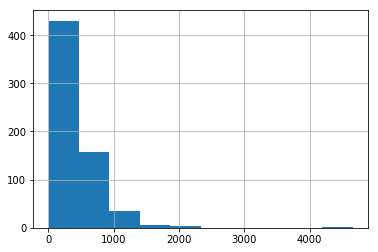

In [12]:
population.num_rated_beers.hist()

In [13]:
population2=population[(population.num_rated_beers >= 500) & (population.num_rated_beers <= 2500)]

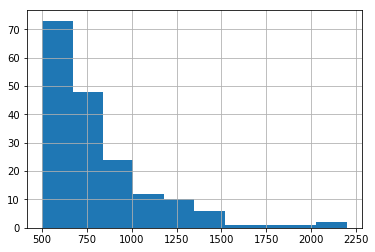

In [14]:
population2.num_rated_beers.hist()

In [15]:
df=pd.merge(df, user_beers, on='profile_name', how='outer')

In [16]:
df.head(2)

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,time2,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers
0,Caldera Ginger Beer,52159,1075,4.7,Herbed / Spiced Beer,3.5,2.5,2.0,3.5,3.0,...,2011-05-24,24,5,2011,13938,2,0,0,0,561
1,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,3.5,4.5,4.0,...,2011-05-24,24,5,2011,13938,2,0,0,1,561


In [17]:
df.shape

(830442, 23)

### we include users that have rated between 500 and 2500 beers

In [18]:
def recode2(row):
    if 500 <= row['num_rated_beers'] <=2500:
        val = 1
    else:
        val = 0
    return val

In [19]:
df['user_recode'] = df.apply (recode2, axis=1)

In [20]:
df.head(5)

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode
0,Caldera Ginger Beer,52159,1075,4.7,Herbed / Spiced Beer,3.5,2.5,2.0,3.5,3.0,...,24,5,2011,13938,2,0,0,0,561,1
1,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,3.5,4.5,4.0,...,24,5,2011,13938,2,0,0,1,561,1
2,Frog's Hollow Double Pumpkin Ale,52211,14879,8.4,Pumpkin Ale,4.5,4.5,4.0,4.0,4.0,...,21,10,2010,13938,2,0,0,1,561,1
3,DNR Belgian-Style Golden Ale,49193,19456,10.0,Belgian Strong Pale Ale,4.0,5.0,4.0,4.0,4.0,...,21,10,2010,13938,2,0,0,1,561,1
4,Polygamy Porter,43893,7402,4.0,American Porter,2.5,4.0,1.5,2.0,3.0,...,8,3,2009,13938,1,0,0,0,561,1


In [21]:
df1= df[(df.user_recode == 1) & (df.rate_recode == 1)]

In [22]:
df1.head()

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode
1,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,3.5,4.5,4.0,...,24,5,2011,13938,2,0,0,1,561,1
2,Frog's Hollow Double Pumpkin Ale,52211,14879,8.4,Pumpkin Ale,4.5,4.5,4.0,4.0,4.0,...,21,10,2010,13938,2,0,0,1,561,1
3,DNR Belgian-Style Golden Ale,49193,19456,10.0,Belgian Strong Pale Ale,4.0,5.0,4.0,4.0,4.0,...,21,10,2010,13938,2,0,0,1,561,1
8,Coney Island Sword Swallower,43149,262,6.8,American Pale Lager,4.0,4.0,3.5,4.0,4.0,...,13,10,2011,13938,3,0,0,1,561,1
9,Founders Breakfast Stout,11757,1199,8.3,American Double / Imperial Stout,4.0,5.0,4.5,4.5,4.0,...,9,11,2009,13938,2,0,0,1,561,1


In [23]:
df1[df1.num_rated_beers>2500]

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode


In [24]:
df1[df1.num_rated_beers<499]

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,day,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode


In [25]:
df1.shape

(104883, 24)

In [26]:
beers_rated_by_user = df1.groupby('Id')['profile_name'].count()
beers_rated_by_user=beers_rated_by_user.to_frame('beers_rated_by_user') 
beers_rated_by_user.reset_index(inplace=True)
beers_rated_by_user.head()

,Id,beers_rated_by_user
0,3,1
1,4,1
2,5,27
3,6,43
4,7,14


In [27]:
df=pd.merge(df1, beers_rated_by_user, on='Id', how='outer')

In [28]:
df.head()

,names,Id,brewerId,ABV,style,appearance,aroma,palate,taste,overall,...,month,year,user_id,beers_by_day,more_beers_than_10,too_much_beers,rate_recode,num_rated_beers,user_recode,beers_rated_by_user
0,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,3.5,4.5,4.0,...,5,2011,13938,2,0,0,1,561,1,15
1,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.0,4.0,4.0,4.5,4.5,...,1,2010,14370,4,0,0,1,828,1,15
2,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.5,4.5,4.0,4.5,4.5,...,1,2010,8523,3,0,0,1,914,1,15
3,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.5,4.5,4.5,4.5,5.0,...,12,2008,7111,1,0,0,1,2150,1,15
4,Short's Cup A Joe Coffee Creme Stout,32941,9629,7.0,American Stout,4.5,4.5,4.5,5.0,5.0,...,12,2009,24192,1,0,0,1,505,1,15


### we quit beers which does not have rated at least 40 times

In [29]:
def recode_beers(row):
    if row['beers_rated_by_user'] >=40:
        val = 1
    else:
        val = 0
    return val

In [30]:
df['enough_beers_rated'] = df.apply (recode_beers, axis=1)

In [31]:
df= df[(df.beers_rated_by_user == 1)]

In [32]:
df.shape

(7771, 26)

In [33]:
df.to_csv('df_to_recommender.csv')